# **1. Implement the SIFT algorithm to detect and match key points between two images.**

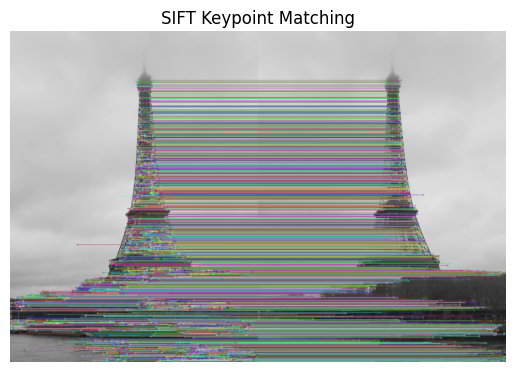

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load two grayscale images
image1 = cv2.imread('/content/free-photo-of-view-of-the-eiffel-tower-from-the-river-seine-on-a-cloudy-day.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/free-photo-of-view-of-the-eiffel-tower-from-the-river-seine-on-a-cloudy-day.jpeg', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Match descriptors using Brute-Force Matcher with k-NN
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw and show the good matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_image)
plt.title("SIFT Keypoint Matching")
plt.axis('off')
plt.show()

## **2. Use RANSAC to remove outlier key point matches and fit a transformation model between two images.**

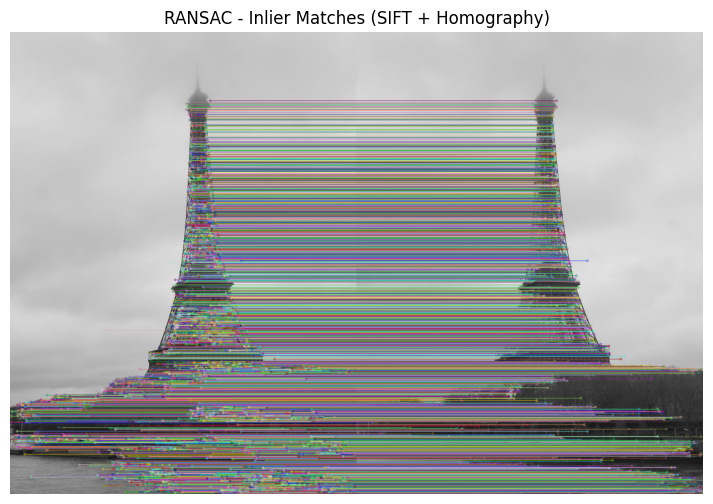

In [10]:
# Load your image pair (grayscale)
img1 = cv2.imread('/content/free-photo-of-view-of-the-eiffel-tower-from-the-river-seine-on-a-cloudy-day.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/free-photo-of-view-of-the-eiffel-tower-from-the-river-seine-on-a-cloudy-day.jpeg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match features using Brute Force Matcher + KNN
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Lowe's Ratio Test to filter matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find homography using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Draw only inliers
    matches_mask = mask.ravel().tolist()
    inlier_matches = [gm for gm, keep in zip(good_matches, matches_mask) if keep]

    result_img = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches, None,
                                 flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show matches
    plt.figure(figsize=(12, 6))
    plt.imshow(result_img)
    plt.title("RANSAC - Inlier Matches (SIFT + Homography)")
    plt.axis('off')
    plt.show()

else:
    print("Not enough matches found.")


# **3. Implement the Harris corner detector to find and visualize corners in a grayscale image.**

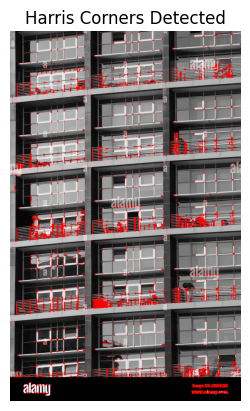

In [3]:
import numpy as np

# Load image and convert to grayscale
image = cv2.imread('/content/multiple-windows-on-a-large-apartment-building-2B39NKK.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Apply Harris Corner Detector
harris_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the result to make the corners more visible
harris_response = cv2.dilate(harris_response, None)

# Threshold to highlight corners
image[harris_response > 0.01 * harris_response.max()] = [0, 0, 255]  # Red color for corners

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners Detected")
plt.axis('off')
plt.show()


# **4. Use the Shi-Tomasi corner detector to identify and mark corner points in an image.**

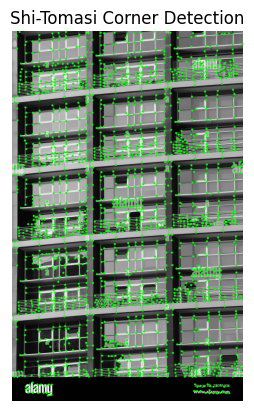

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('/content/multiple-windows-on-a-large-apartment-building-2B39NKK.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect corners using Shi-Tomasi method
corners = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=1000000,         # Maximum number of corners to return
    qualityLevel=0.01,      # Minimal accepted quality of corners
    minDistance=10          # Minimum possible Euclidean distance between corners
)

# Convert floating-point corner coordinates to integers
corners = corners.astype(int)

# Draw green circles at detected corner points
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (0, 255, 0), -1)

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis('off')
plt.show()
